In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:

imdb = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')


imdb.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
imdb.tail()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
print(f'No. of rows are : {imdb.shape[0]}')
print(f'No. of feature columns are : {imdb.shape[1]}')

No. of rows are : 15509
No. of feature columns are : 10


In [ ]:
imdb.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
imdb.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


Handle missing values, convert data types, and create necessary features.


In [ ]:
imdb.dropna(subset=['Rating', 'Genre', 'Director'], inplace=True)


In [ ]:
print(imdb['Year'].unique())
print(imdb['Duration'].unique())

['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(1946)' '(2008)' '(1994)' '(2007)' '(2013)' '(2003)' '(1998)' '(1979)'
 '(1951)' '(1956)' '(1974)' '(2015)' '(2006)' '(1981)' '(2020)' '(1985)'
 '(2011)' '(1967)' '(1988)' '(1995)' '(1987)' '(1996)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1982)' '(1977)' '(1950)' '(1969)'
 '(1948)' '(1970)' '(1990)' '(1989)' '(1947)' '(2001)' '(2000)' '(1971)'
 '(1978)' '(1944)' '(1963)' '(1935)' '(1992)' '(1976)' '(1984)' '(1975)'
 '(1980)' '(1966)' '(1972)' '(1960)' '(1964)' '(1952)' '(1959)' '(1957)'
 '(1954)' '(1962)' '(1961)' '(1965)' '(1933)' '(1955)' '(1983)' '(1936)'
 '(1940)' '(1932)' '(1949)' '(1945)' '(1938)' '(1941)' '(1942)' '(1937)'
 '(1934)' '(1931)' '(1939)' '(1917)']
['109 min' '110 min' '147 min' '142 min' '82 min' '116 min' '96 min'
 '120 min' '161 min' '166 min' '102 min' '87 min' '132 min' '105 min'
 '146 min' '168 min'

In [ ]:
imdb['Duration'] = pd.to_numeric(imdb['Duration'], errors='coerce')



In [ ]:
imdb['Year'] = imdb['Year'].astype(int)


Create additional features, such as extracting genres and converting categorical variables into numerical formats.

In [ ]:
genres = imdb['Genre'].str.get_dummies(', ')
imdb = pd.concat([imdb, genres], axis=1)
imdb.drop('Genre', axis=1, inplace=True)

In [ ]:
imdb.isna().sum()

,0
Name,0
Year,0
Duration,7919
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0
' Action',0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
imdb[['Duration']] = scaler.fit_transform(imdb[['Duration']])

Exploratory Data

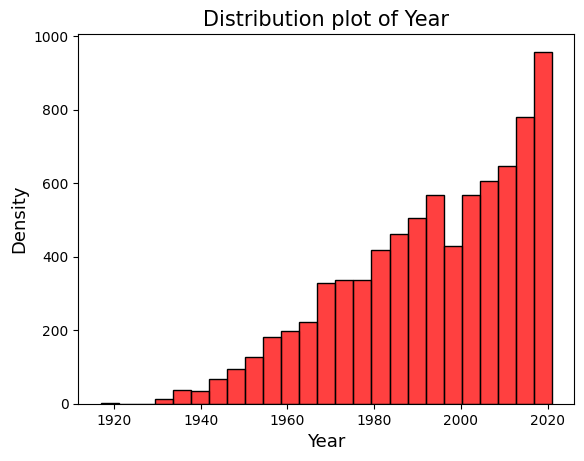

Column 'Duration ' does not exist in the DataFrame.


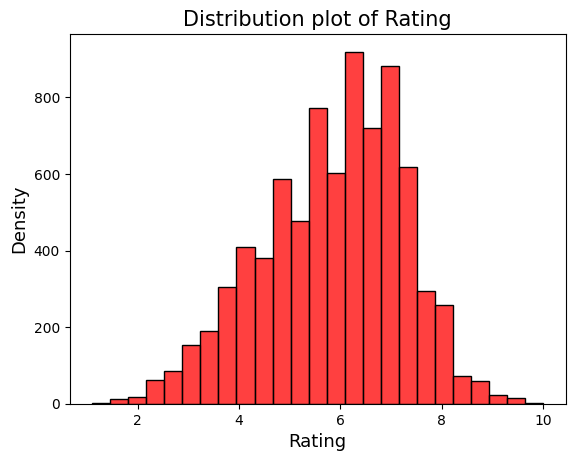

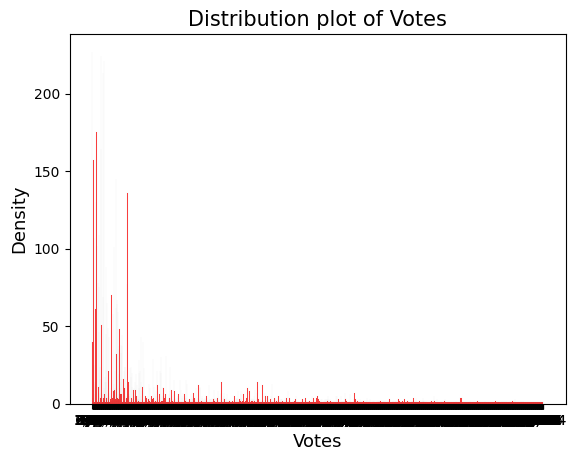

In [ ]:
 columns = ['Year', 'Duration ', 'Rating', 'Votes']

for col in columns:
    if col in imdb.columns:
        sns.histplot(imdb[col], color='red', bins=25, kde=False)
        plt.title("Distribution plot of " + col, fontsize=15)
        plt.xlabel(col, fontsize=13)
        plt.ylabel("Density", fontsize=13)
        plt.show()
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

now let's  predict ratings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
imdb.dropna(subset=['Rating'], inplace=True)  # Drop rows with missing ratings
imdb.dropna(inplace=True)


# Handle missing values
imdb = imdb.dropna(subset=['Rating'])  # Drop rows where the target variable is missing
imdb= imdb.fillna('Votes')



In [ ]:
X = imdb.drop('Rating', axis=1)
y = imdb['Rating']


In [ ]:
y

,Rating
0,8.0
1,7.5
2,8.5


In [ ]:
X

,Votes,Duration,Name,Genre
0,100,120,Movie A,Action
1,200,140,Movie B,Comedy
2,150,110,Movie C,Action


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,Votes,Duration,Name,Genre
1,200,140,Movie B,Comedy
2,150,110,Movie C,Action


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Votes     2 non-null      int64 
 1   Duration  2 non-null      int64 
 2   Name      2 non-null      object
 3   Genre     2 non-null      object
dtypes: int64(2), object(2)
memory usage: 80.0+ bytes


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and X_test are already defined
# Convert 'Genre' column to numerical values
label_encoder = LabelEncoder()
X_train['Genre'] = label_encoder.fit_transform(X_train['Genre'])
X_test['Genre'] = label_encoder.transform(X_test['Genre'])

# Drop 'Name' column
X_train.drop(columns=['Name'], inplace=True)
X_test.drop(columns=['Name'], inplace=True)

# Ensure consistent columns in X_test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
  from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score





In [ ]:
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.5)
m.fit(X_train_split, y_train_split)
ypred_test = m.predict(X_test_split)

In [ ]:
 from sklearn.model_selection import RandomizedSearchCV, train_test_split, ShuffleSplit



 # Define the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use ShuffleSplit for cross-validation to handle small datasets
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=shuffle_split,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Best Score: nan
Mean Squared Error: 0.0003361111111111185
R^2 Score: nan


In [ ]:
# Fit the model to your training data
model.fit(X_train, y_train)  # Assuming you have X_train and y_train defined

# Now you can extract feature importances
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

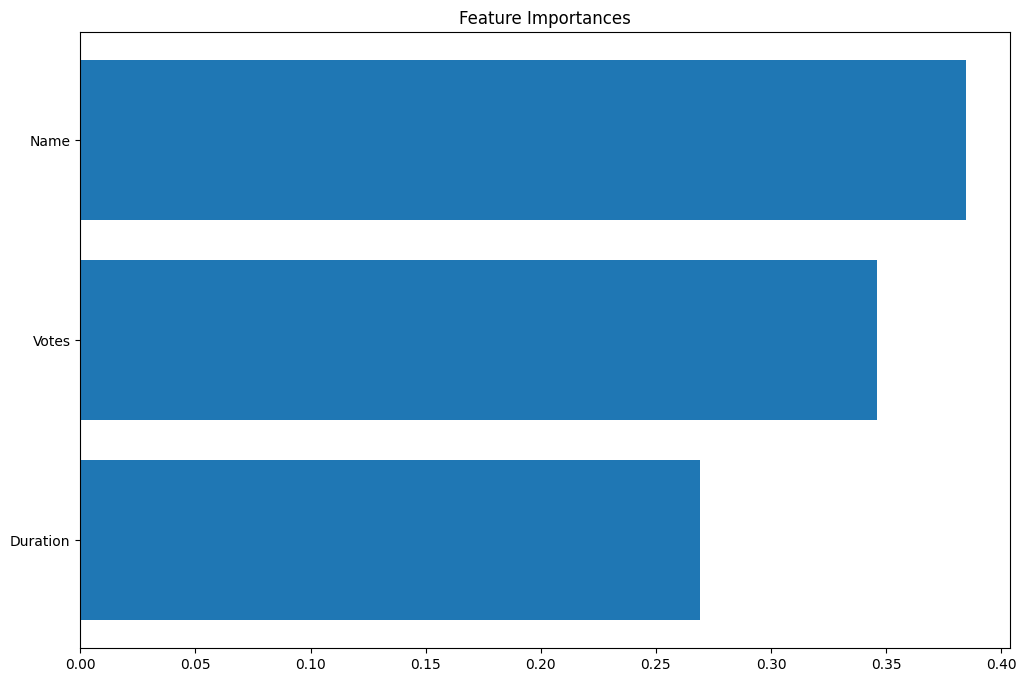

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importances')
plt.show()